
# 2 - Data exploration


In [1]:
# import parameters
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams["figure.figsize"] = (20,10)

## 2.1 Incidents data overview

In [2]:
incidents = pd.read_excel('../data/incidents_2019-08-09/hl2010toPresent.xlsx', 
                          sheet_name=1)

incidents.sample(5)

,DATAFILE_AS_OF,SIGNIFICANT,SERIOUS,IPE,IA_IPE,OM_IPE,REPORT_NUMBER,SUPPLEMENTAL_NUMBER,REPORT_RECEIVED_DATE,REPORT_TYPE,...,PREPARER_TITLE,PREPARER_EMAIL,PREPARER_TELEPHONE,PREPARER_FAX,PREPARED_DATE,AUTHORIZER_NAME,AUTHORIZER_TITLE,AUTHORIZER_TELEPHONE,AUTHORIZER_EMAIL,NARRATIVE
3677,2019-07-31 08:37:40,NO,NO,NO,NO,NO,20190091,32345,2019-03-21 16:24:54,SUPPLEMENTAL FINAL,...,PIPELINE ENGINEER,kyle_mayberry@kindermorgan.com,713-420-4454,713-495-2713,2019-06-27,QUINTIN FRAZIER,DIRECTOR COMPLIANCE CODES AND STANDARDS,770-751-4240,quintin_frazier@kindermorgan.com,"ON THE MORNING OF FEBRUARY 20, 2019 AN ON-SITE..."
1368,2019-07-31 08:37:40,YES,NO,NO,NO,NO,20130345,19659,2013-10-24 12:20:55,SUPPLEMENTAL FINAL,...,COMPLIANCE SPECIALIST,lhughes@buckeye.com,610-904-4248,NaN,2014-08-15,CLAUDIA PANKOWSKI,DIRECTOR OF REGULATORY COMPLIANCE,610-904-4113,cpankowski@buckeye.com,"ON SEPTEMBER 26, 2013 AT 14:30 A BUCKEYE EMPLO..."
851,2019-07-31 08:37:40,NO,NO,NO,NO,NO,20120197,17491,2012-06-28 11:41:44,SUPPLEMENTAL FINAL,...,REGULATORY SPECIALIST,richard.klasen@shell.com,713-241-1064,713-241-2596,2013-03-13,BRIAN SITTERLY,INTEGRITY REGULATORY SERVICES MANAGER,713-241-3620,brian.sitterly@shell.com,HEAVY RAIN EVENT CAUSED TANK #2 EXTERNAL FLOAT...
2262,2019-07-31 08:37:40,NO,NO,YES,YES,NO,20150396,20889,2015-11-10 14:42:14,ORIGINAL FINAL,...,REGULATORY SPECIALIST,richard.klasen@shell.com,713-241-1064,713-241-8498,2015-11-10,DEBORAH PRICE,INTEGRITY AND REGULATORY SERVICES MANAGER,713-241-2035,deborah.price@shell.com,THE UPPER LEVEL SUMP GAUGE COCK HAD EXTERNAL C...
3566,2019-07-31 08:37:40,NO,NO,NO,NO,NO,20180391,32033,2018-12-17 11:06:19,SUPPLEMENTAL FINAL,...,DIRECTOR OF EHS-REGULATORY,tburgin@medallionmidstream.com,469-262-6060,NaN,2019-04-29,TOBY BURGIN,DIRECTOR OF EHS-REGULATORY,469-262-6060,tburgin@medallionmidstream.com,"ON MONDAY, NOVEMBER 19, 2018, AT 12:30 P.M. LO..."


In [3]:
incidents['NAME'].value_counts().head(10)

ENTERPRISE CRUDE PIPELINE LLC          276
ENTERPRISE PRODUCTS OPERATING LLC      214
SUNOCO PIPELINE L.P.                   211
PLAINS PIPELINE, L.P.                  203
MAGELLAN PIPELINE COMPANY, LP          180
COLONIAL PIPELINE CO                   177
BUCKEYE PARTNERS, LP                   148
PHILLIPS 66 PIPELINE LLC               121
KINDER MORGAN LIQUID TERMINALS, LLC    117
MARATHON PIPE LINE LLC                 111
Name: NAME, dtype: int64

In [4]:
incidents['OPERATOR_ID'].value_counts().head(10)

30829    282
31618    214
18718    211
300      202
22610    180
2552     177
31684    155
1845     148
26041    117
32109    112
Name: OPERATOR_ID, dtype: int64

In [5]:
incidents['COMMODITY_RELEASED_TYPE'].unique()

array(['REFINED AND/OR PETROLEUM PRODUCT (NON-HVL) WHICH IS A LIQUID AT AMBIENT CONDITIONS',
       'CO2 (CARBON DIOXIDE)',
       'HVL OR OTHER FLAMMABLE OR TOXIC FLUID WHICH IS A GAS AT AMBIENT CONDITIONS',
       'CRUDE OIL',
       'BIOFUEL / ALTERNATIVE FUEL(INCLUDING ETHANOL BLENDS)'],
      dtype=object)

There seem to be some minor discrepancies between ID and name. Matching every ID to its most common company name should fix it. 

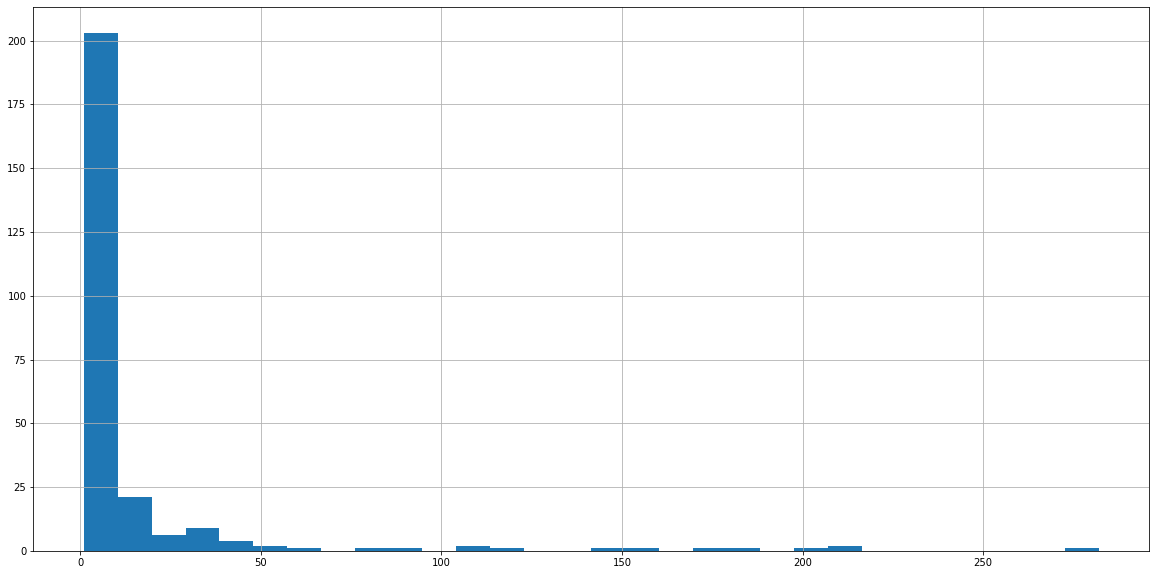

In [6]:
incidents['OPERATOR_ID'].value_counts().hist(bins=30, figsize=(20, 10))

In [7]:
len(incidents)

3819

## 2.2 Oil pipeline data

In [8]:
oil_pipelines = pd.read_excel('../data/pipelines_2010_present_2019-08-09/annual_hazardous_liquid_2010.xlsx', skiprows=2)

oil_pipelines.sample(5)

,DATAFILE_AS_OF,REPORT_YEAR,REPORT_NUMBER,SUPPLEMENTAL_NUMBER,OPERATOR_ID,PARTA2NAMEOFCOMP,PARTA4STREET,PARTA4CITY,PARTA4STATE,PARTA4ZIP,...,PARTE2010HF,PARTE2010LF,PARTE2010TOTAL,PARTETOTAL,PARTETOTALHF,PARTETOTALLF,REPORT_SUBMISSION_TYPE,REPORT_DATE,FILING_DATE,FORM_REV
298,2019-08-01 13:10:42,2010,20110077,10078,31582,"BEAR PAW ENERGY, LLC",100 West Fifth Street,Tulsa,OK,74103-4298,...,0.0,0.0,0.0,11.0,11.0,0.0,INITIAL,2011-08-10 11:15:47,2011-08-10 11:15:47,7000-1.1 (Rev. 06-2011)
442,2019-08-01 13:10:42,2010,20110007,10007,32385,"FRONTIER GAS SERVICES, LLC","4200 E. SKELLY DR., SUITE 400",TULSA,OK,74135,...,0.0,0.0,0.0,16.7,0.0,16.7,INITIAL,2011-07-28 11:30:53,2011-07-28 11:30:53,7000-1.1 (Rev. 06-2011)
378,2019-08-01 13:10:42,2010,20110063,11662,32073,AGAVE ENERGY COMPANY,105 SOUTH 4TH STREET,ARTESIA,NM,88210,...,0.0,0.0,0.0,11.0,11.0,0.0,SUPPLEMENTAL,2011-08-08 15:47:31,2013-02-22 11:32:09,7000-1.1 (Rev. 06-2011)
443,2019-08-01 13:10:42,2010,20110434,10466,32386,OILTANKING BEAUMONT PARTNERS L.P.,6275 HWY. 347,BEAUMONT,TX,77705,...,0.0,0.0,0.0,0.0,0.0,0.0,INITIAL,2011-09-27 11:02:21,2011-09-27 11:02:21,7000-1.1 (Rev. 06-2011)
370,2019-08-01 13:10:42,2010,20110374,10393,32009,EXXONMOBIL OIL CORPORATION-TERMINALS,800 BELL STREET,HOUSTON,TX,77002,...,0.0,0.0,0.0,0.0,0.0,0.0,INITIAL,2011-08-16 16:32:34,2011-08-16 16:32:34,7000-1.1 (Rev. 06-2011)


In [9]:
from os import listdir

pipeline_files = [file for file in listdir('../data/pipelines_2010_present_2019-08-09/') if'annual_hazardous_liquid' in file]
pipeline_files

['annual_hazardous_liquid_2017.xlsx',
 'annual_hazardous_liquid_2011.xlsx',
 'annual_hazardous_liquid_2014.xlsx',
 'annual_hazardous_liquid_2012.xlsx',
 'annual_hazardous_liquid_2013.xlsx',
 'annual_hazardous_liquid_2010.xlsx',
 'annual_hazardous_liquid_2018.xlsx',
 'annual_hazardous_liquid_2016.xlsx',
 'annual_hazardous_liquid_2015.xlsx']

In [10]:
pipelines = pd.concat([pd.read_excel(f'../data/pipelines_2010_present_2019-08-09/{file}', skiprows=2) for file in pipeline_files])
pipelines = pipelines.reset_index(drop = True)

pipelines.sample(5)

,DATAFILE_AS_OF,REPORT_YEAR,REPORT_NUMBER,SUPPLEMENTAL_NUMBER,OPERATOR_ID,PARTA2NAMEOFCOMP,PARTA4STREET,PARTA4CITY,PARTA4STATE,PARTA4ZIP,...,PARTE2010HF,PARTE2010LF,PARTE2010TOTAL,PARTETOTAL,PARTETOTALHF,PARTETOTALLF,REPORT_SUBMISSION_TYPE,REPORT_DATE,FILING_DATE,FORM_REV
802,2019-08-01 13:14:22,2011,20120504,11970,20046,UNION CARBIDE CHEMICALS & PLASTICS CO INC,437 MACCORKLE AVENUE,SOUTH CHARLESTON,WV,25303,...,0.0,0.0,0.0,0.0,0.0,0.0,SUPPLEMENTAL,2012-11-09 08:09:34,2013-06-10 11:04:28,7000-1.1 (Rev. 06-2011)
4096,2019-08-01 13:52:01,2016,20172420,14772,8014,IDAHO PIPELINE CORP,POB 35236,SARASOTA,FL,34242,...,0.0,0.0,0.0,2.0,2.0,0.0,INITIAL,2017-04-24 13:13:39,2017-04-24 13:13:39,7000-1.1 (Rev. 06-2014)
1788,2019-08-01 13:19:08,2012,20130287,12087,1248,BELLE FOURCHE PIPELINE CO,455 N POPLAR ST.,CASPER,WY,82602,...,0.0,0.0,0.0,75.0,26.0,49.0,INITIAL,2013-06-13 12:49:06,2013-06-13 12:49:06,7000-1.1 (Rev. 06-2011)
2353,2019-08-01 13:23:46,2013,20140767,13866,4908,"EXXONMOBIL PRODUCTION COMPANY, A DIVISION OF E...","800 BELL STREET, (P.O. BOX 4358, 77210-4358)",HOUSTON,TX,77210,...,0.0,0.0,0.0,0.0,0.0,0.0,SUPPLEMENTAL,2014-06-10 10:45:11,2015-07-15 16:16:45,7000-1.1 (Rev. 06-2014)
1827,2019-08-01 13:19:08,2012,20130315,12338,4908,"ExxonMobil Production Company, a division of E...","800 BELL STREET, (P.O. BOX 4358, 77210-4358)",HOUSTON,TX,77092,...,0.0,0.0,0.0,0.0,0.0,0.0,SUPPLEMENTAL,2013-06-13 17:25:18,2013-06-25 13:14:50,7000-1.1 (Rev. 06-2011)


See which company has the vastest pipeline network.

In [11]:
pipelines.loc[pipelines.groupby('OPERATOR_ID')['PARTBHCATOTAL'].idxmax()].nlargest(10, 'PARTBHCATOTAL')[['REPORT_YEAR', 'OPERATOR_ID', 'PARTA2NAMEOFCOMP', 'PARTBHCATOTAL']]

,REPORT_YEAR,OPERATOR_ID,PARTA2NAMEOFCOMP,PARTBHCATOTAL
3634,2018,31618,ENTERPRISE PRODUCTS OPERATING LLC,7726.183
3704,2018,32109,"ONEOK NGL PIPELINE, LLC",4531.480
4723,2015,2552,COLONIAL PIPELINE CO,4500.920
4715,2015,1845,"BUCKEYE PARTNERS, LP",4266.430
3484,2018,22610,"MAGELLAN PIPELINE COMPANY, LP",3926.400
4135,2016,15674,PLANTATION PIPE LINE CO,2564.730
4035,2016,300,"PLAINS PIPELINE, L.P.",2312.330
67,2017,11169,"ENBRIDGE ENERGY, LIMITED PARTNERSHIP",2290.000
3186,2010,31684,CONOCOPHILLIPS,2283.790
2693,2013,32147,MARATHON PIPE LINE LLC,2281.900


In [12]:
pipelines['PARTA5COMMODITY'].unique()

array(['Crude Oil', 'HVL', 'Refined and/or Petroleum Product (non-HVL)',
       'CO2', 'Fuel Grade Ethanol (dedicated system)'], dtype=object)

Compare to

In [13]:
incidents['COMMODITY_RELEASED_TYPE'].unique()

array(['REFINED AND/OR PETROLEUM PRODUCT (NON-HVL) WHICH IS A LIQUID AT AMBIENT CONDITIONS',
       'CO2 (CARBON DIOXIDE)',
       'HVL OR OTHER FLAMMABLE OR TOXIC FLUID WHICH IS A GAS AT AMBIENT CONDITIONS',
       'CRUDE OIL',
       'BIOFUEL / ALTERNATIVE FUEL(INCLUDING ETHANOL BLENDS)'],
      dtype=object)

The types correspond well, but the terminology is different.

## 2.3 Gas pipelines

In [14]:
gas_pipelines = pd.read_excel('../data/gas_2010_present_2019-08-09/annual_liquefied_natural_gas_2015.xlsx', skiprows=1)

gas_pipelines.sample(5)

,DATAFILE_AS_OF,REPORT_YEAR,REPORT_NUMBER,SUPPLEMENTAL_NUMBER,OPERATOR_ID,PARTA2NAMEOFCOMP,PARTA2NAMEOFPARENT_COM,PARTA3NAME,PARTA3TITLE,PARTA3EMAIL,...,PARTA4ZIP,REPORT_SUBMISSION_TYPE,REPORT_DATE,FILING_DATE,FORM_REV,PARTNPREPNAME,PARTNPREPTITLE,PARTNPREPEMAIL,PARTNPREPPHONE,PARTNPREPFAX
19,2019-08-01 14:19:07,2015,20160266,530,4350,ELIZABETHTOWN GAS CO,"AGL Resources, Inc.",Ralph McCollum,Sr Compliance Engineer,rmccollu@aglresources.com,...,07083,INITIAL,2016-01-28 08:43:45,2016-01-28 08:43:45,7100.3-1 (Rev. 10-2014),Ralph McCollum,Sr Compliance Engineer,rmccollu@aglresources.com,(404) 584-3733,(404)584-4710
54,2019-08-01 14:19:07,2015,20160327,600,18490,"SOUTHERN LNG, INC",Kinder Morgan Inc,"Scott J. Walden, Sr.","Manager, Compliance LNG Division",scott_walden@kindermorgan.com,...,77002,INITIAL,2016-03-14 08:36:10,2016-03-14 08:36:10,7100.3-1 (Rev. 10-2014),Carla Roark,Regulatory Analyst,carla_roark@kindermorgan.com,(912)944-3856,NaN
44,2019-08-01 14:19:07,2015,20160272,541,15469,PHILADELPHIA GAS WORKS,NaN,Curt Malkemes,"Director, Gas Processing",curt.malkemes@pgworks.com,...,19122,INITIAL,2016-02-10 09:42:40,2016-02-10 09:42:40,7100.3-1 (Rev. 10-2014),Curt Malkemes,"Director, Gas Processing",curt.malkemes@pgworks.com,(215)684-6416,NaN
57,2019-08-01 14:19:07,2015,20160293,562,22189,PUGET SOUND ENERGY,Puget Energy,Darryl,Hong,darryl.hong@pse.com,...,98009-0868,INITIAL,2016-03-01 18:49:30,2016-03-01 18:49:30,7100.3-1 (Rev. 10-2014),Dave Wooten,Supervisor Alternative Fuels,david.wooten@pse.com,(452)505-3442,NaN
71,2019-08-01 14:19:07,2015,20160283,552,32214,"CAMERON LNG, LLC",NaN,Dan Callens,VP of Terminal Operations,dcallens@cameronlng.com,...,77042,INITIAL,2016-02-22 11:55:26,2016-02-22 11:55:26,7100.3-1 (Rev. 10-2014),Clayton Miller,Environmental Supervisor,cmiller@cameronlng.com,(337) 680-4531,(337)602-9509


In [15]:
gas_files = [file for file in listdir('../data/gas_2010_present_2019-08-09/') if'annual_liquefied_natural_gas' in file]
gas_files

['annual_liquefied_natural_gas_2013.xlsx',
 'annual_liquefied_natural_gas_2011.xlsx',
 'annual_liquefied_natural_gas_2016.xlsx',
 'annual_liquefied_natural_gas_2012.xlsx',
 'annual_liquefied_natural_gas_2017.xlsx',
 'annual_liquefied_natural_gas_2018.xlsx',
 'annual_liquefied_natural_gas_2010.xlsx',
 'annual_liquefied_natural_gas_2014.xlsx',
 'annual_liquefied_natural_gas_2015.xlsx']

In [16]:
gas = pd.concat([pd.read_excel(f'../data/gas_2010_present_2019-08-09/{file}', skiprows=1) for file in gas_files[:3]], sort=False)
gas = gas.reset_index(drop = True)

gas.sample(5)

,DATAFILE_AS_OF,REPORT_YEAR,REPORT_NUMBER,SUPPLEMENTAL_NUMBER,OPERATOR_ID,PARTA2NAMEOFCOMP,PARTA2NAMEOFPARENT_COM,PARTA3NAME,PARTA3TITLE,PARTA3EMAIL,...,PARTA4ZIP,REPORT_SUBMISSION_TYPE,REPORT_DATE,FILING_DATE,FORM_REV,PARTNPREPNAME,PARTNPREPTITLE,PARTNPREPEMAIL,PARTNPREPPHONE,PARTNPREPFAX
219,2019-08-01 14:20:39,2016,20170416,729,22189,PUGET SOUND ENERGY,NaN,Lee Maxwell,SR. Regulatory Compliance Analyst,lee.maxwell@pse.com,...,98009-0868,INITIAL,2017-03-14 23:25:45,2017-03-14 23:25:45,7100.3-1 (Rev. 10-2014),David Wooten,Supervisor Alternative Fuels,david.wooten@pse.com,(452)505-3442,NaN
60,2019-08-01 14:16:07,2013,20140140,358,22777,WISCONSIN ELECTRIC POWER COMPANY DBA WE ENERGIES,Wisconsin Energy Corporation,Tim Strommen,MANAGER REGULATORY COMPLIANCE,tim.strommen@we-energies.com,...,53203,INITIAL,2014-03-11 11:47:20,2014-03-11 11:47:20,7100.3-1 (Rev. 06-2011),Todd Gretebeck,Manager - LNG/Propane Plant Operations,todd.gretebeck@we-energies.com,(414) 221-5378,(414) 571-3593
39,2019-08-01 14:16:07,2013,20140109,319,13860,"NORWICH DEPT OF PUBLIC UTILITIES, CITY OF",NaN,Christopher LaRose,Assistant General Manager,chrislarose@npumail.com,...,06360,INITIAL,2014-02-21 11:47:38,2014-02-21 11:47:38,7100.3-1 (Rev. 06-2011),Christopher LaRose,Assistant General Manager,chrislarose@npumail.com,(860) 823-4173,(860) 823-4172
97,2019-08-01 14:12:58,2011,20120028,32,2700,CONNECTICUT NATURAL GAS CORP,UIL Holding Corp,David Fritsch,"Director, Production & Gas Control",dfritsch@ctgcorp.com,...,06108,INITIAL,2012-02-29 11:17:27,2012-02-29 11:17:27,7100.3-1 (Rev. 06-2011),Robert Kopjanski,"Manager, LNG Plants",rkopjanski@soconngas.com,(203) 874-6763,(203) 874-5281
20,2019-08-01 14:16:07,2013,20140125,342,4547,ESSEX COUNTY GAS CO,National Grid,walter doucette,Plant Manager,walter.doucette@nationalgrid.com,...,02451,INITIAL,2014-03-05 07:29:28,2014-03-05 07:29:28,7100.3-1 (Rev. 06-2011),Steven Renna,Lead Engineer,steven.renna@nationalgrid.com,(631) 471-1660,(631) 471-1601


The warning stems from the fact that the PARTA4NAMEOFCOMP columns was dropped, starting from 2014 (see below). Fortunately, we can use the field "PARTA2NAMEOFCOMP" and "PARTA2NAMEOFPARENT_COM" to get the information.

In [17]:
gas_columns_2010 = pd.read_excel('../data/gas_2010_present_2019-08-09/annual_liquefied_natural_gas_2010.xlsx', skiprows=1, skipfooter=999).columns.tolist()
gas_columns_2014 = pd.read_excel('../data/gas_2010_present_2019-08-09/annual_liquefied_natural_gas_2014.xlsx', skiprows=1, skipfooter=999).columns.tolist()
set(gas_columns_2010) - set(gas_columns_2014)

{'PARTA4NAMEOFCOMP'}

## 2.4. Where do incidents occur? Regular, or LNG pipelines?

### 2.4.1 Are there operators who operate both regular and LNG pipelines?

In [18]:
gas_operators = np.unique(gas['OPERATOR_ID']).tolist()
gas_operators[:5]

[180, 630, 792, 909, 1088]

In [19]:
pipeline_operators = np.unique(pipelines['OPERATOR_ID']).tolist()
pipeline_operators[:5]

[300, 395, 401, 402, 473]

In [20]:
common_operators = set(gas_operators).intersection(set(pipeline_operators))
print(common_operators)

{31636}


Only one company occurs on both lists.

In [21]:
pipelines.loc[pipelines['OPERATOR_ID'].isin(common_operators) & (pipelines['REPORT_YEAR'] == 2017)]['PARTA2NAMEOFCOMP'].tolist()

['NORTHERN STATES POWER CO OF MINNESOTA']

### 2.4.2 Where do the accidents occur?

In [22]:
incidents.loc[incidents['OPERATOR_ID'] == 31636]

,DATAFILE_AS_OF,SIGNIFICANT,SERIOUS,IPE,IA_IPE,OM_IPE,REPORT_NUMBER,SUPPLEMENTAL_NUMBER,REPORT_RECEIVED_DATE,REPORT_TYPE,...,PREPARER_TITLE,PREPARER_EMAIL,PREPARER_TELEPHONE,PREPARER_FAX,PREPARED_DATE,AUTHORIZER_NAME,AUTHORIZER_TITLE,AUTHORIZER_TELEPHONE,AUTHORIZER_EMAIL,NARRATIVE


Our common operators has no incidents, so we can ignore this segment.

In [23]:
regular_pipeline_incidents = incidents['OPERATOR_ID'].isin(pipelines['OPERATOR_ID']).sum()
regular_pipeline_incidents

3814

In [24]:
nlg_pipeline_incidents = incidents['OPERATOR_ID'].isin(gas['OPERATOR_ID']).sum()
nlg_pipeline_incidents

0

Looks like we can ignore this second dataset for our analysis.

## 2.5 Pipeline age - distribution and missingness

In [25]:
import rpy2.rinterface

In [26]:
%load_ext rpy2.ipython

In [27]:
pipelines_age = pipelines[['OPERATOR_ID', 'REPORT_YEAR', 'PARTEUNKNTOTAL', 'PARTEPRE40TOTAL'] + 
                          [f'PARTE19{decade}0TOTAL' for decade in range(5,10)] + 
                          ['PARTE2000TOTAL', 'PARTE2010TOTAL', 'PARTETOTAL']]
pipelines_age.sample(5)

,OPERATOR_ID,REPORT_YEAR,PARTEUNKNTOTAL,PARTEPRE40TOTAL,PARTE1950TOTAL,PARTE1960TOTAL,PARTE1970TOTAL,PARTE1980TOTAL,PARTE1990TOTAL,PARTE2000TOTAL,PARTE2010TOTAL,PARTETOTAL
431,32522,2017,0.0,0.0,0.0,0.0,4.20,0.0,0.00,0.0,0.0,4.2
3037,26120,2010,0.0,0.0,0.0,0.0,127.32,0.0,0.08,0.6,0.0,128.0
1768,99002,2014,0.0,0.0,0.0,0.0,10.50,0.0,0.00,0.0,0.0,10.5
1798,2371,2012,0.0,0.0,86.0,0.0,46.50,0.0,34.70,8.5,0.0,175.7
1123,32453,2011,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0


R[write to console]: `stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



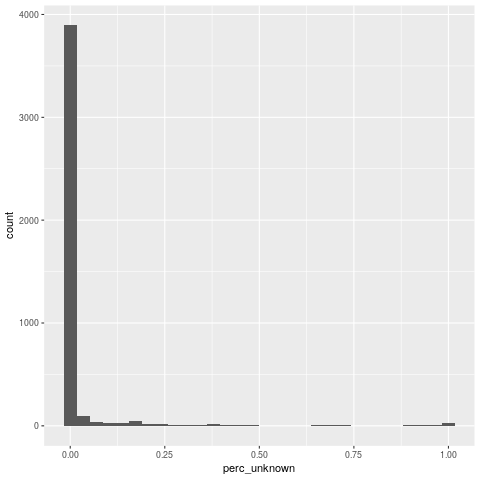

In [28]:
%%R -i pipelines_age
suppressMessages(library(tidyverse))

pipelines_age %>%
    group_by(OPERATOR_ID, REPORT_YEAR) %>%
    mutate(perc_unknown = PARTEUNKNTOTAL / PARTETOTAL) %>%
    ggplot(aes(x=perc_unknown)) + 
    geom_histogram()

Unknown age fortunately is not an issue.

R[write to console]: `stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



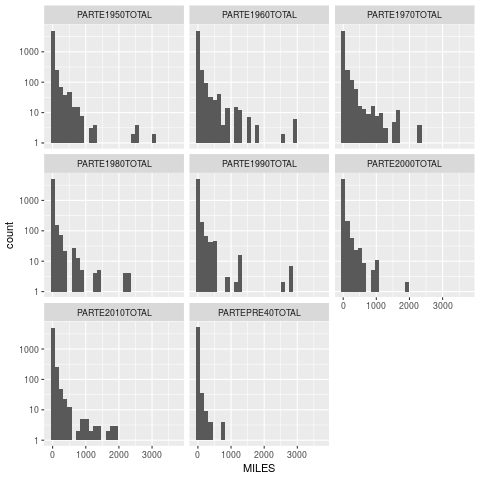

In [29]:
%%R -i pipelines_age
pipelines_age %>%
    gather(PARTEPRE40TOTAL, PARTE1950TOTAL, PARTE1960TOTAL, PARTE1970TOTAL, PARTE1980TOTAL, PARTE1990TOTAL, 
           PARTE2000TOTAL, PARTE2010TOTAL, key = 'DECADE', value = 'MILES') %>%
    ggplot(aes(x=MILES)) + 
    geom_histogram() +
    facet_wrap(~DECADE, nrow=3) + 
    scale_y_log10()

R[write to console]: `stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



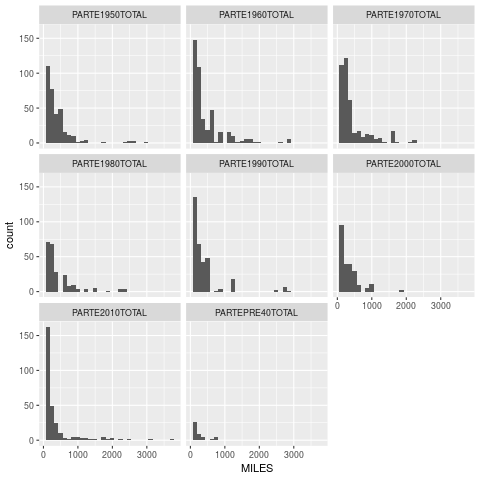

In [30]:
%%R -i pipelines_age
pipelines_age %>%
    gather(PARTEPRE40TOTAL, PARTE1950TOTAL, PARTE1960TOTAL, PARTE1970TOTAL, PARTE1980TOTAL, PARTE1990TOTAL, 
           PARTE2000TOTAL, PARTE2010TOTAL, key = 'DECADE', value = 'MILES') %>%
    filter(MILES > 100) %>%
    ggplot(aes(x=MILES)) + 
    geom_histogram() +
    facet_wrap(~DECADE, nrow=3)

In [31]:
%%R -i pipelines_age
pipelines_age %>%
    gather(PARTEPRE40TOTAL, PARTE1950TOTAL, PARTE1960TOTAL, PARTE1970TOTAL, PARTE1980TOTAL, PARTE1990TOTAL, 
           PARTE2000TOTAL, PARTE2010TOTAL, key = 'DECADE', value = 'MILES') %>%
    group_by(DECADE) %>%
    summarize(total_miles = sum(MILES))

# A tibble: 8 x 2
  DECADE          total_miles
  <chr>                 <dbl>
1 PARTE1950TOTAL      157897.
2 PARTE1960TOTAL      216401.
3 PARTE1970TOTAL      202377.
4 PARTE1980TOTAL      124982.
5 PARTE1990TOTAL      145727.
6 PARTE2000TOTAL      104471.
7 PARTE2010TOTAL      127693.
8 PARTEPRE40TOTAL      13968.


In [32]:
%%R -i pipelines_age
pipelines_age %>%
    gather(PARTEPRE40TOTAL, PARTE1950TOTAL, PARTE1960TOTAL, PARTE1970TOTAL, PARTE1980TOTAL, PARTE1990TOTAL, 
           PARTE2000TOTAL, PARTE2010TOTAL, key = 'DECADE', value = 'MILES') %>%
    group_by(DECADE, REPORT_YEAR) %>%
    summarize(total_miles = sum(MILES)) %>%
    spread(REPORT_YEAR, total_miles)

# A tibble: 8 x 10
# Groups:   DECADE [8]
  DECADE          `2010` `2011` `2012` `2013` `2014` `2015` `2016` `2017` `2018`
  <chr>            <dbl>  <dbl>  <dbl>  <dbl>  <dbl>  <dbl>  <dbl>  <dbl>  <dbl>
1 PARTE1950TOTAL  18215. 17787. 18754. 18026. 16827. 17642. 17164. 16595. 16887.
2 PARTE1960TOTAL  25484. 25091. 24753. 24387. 23923. 23284. 23782. 23417. 22280.
3 PARTE1970TOTAL  23080. 23235. 22704. 22526. 22095. 21733. 22518. 22303. 22183.
4 PARTE1980TOTAL  13802. 13885. 13816. 14206. 13423. 13729. 14179. 14091. 13851.
5 PARTE1990TOTAL  16440. 16401. 16198. 16289. 15995. 16052. 16007. 15934. 16410.
6 PARTE2000TOTAL  11546. 11631. 11581. 11683. 10951. 11072. 11479. 11283. 13243.
7 PARTE2010TOTAL    484.  1686.  4072.  9935. 15081. 18591. 22780. 26051. 29014.
8 PARTEPRE40TOTAL     0      0      0      0   2550.  3007.  2905.  2791.  2716.


The distribution across decades is surprisingly balanced. Strong trends are not discernible, there is the construction of new pipelines, and some pre-1980 pipelines are being retired.

## 2.6 How much % is offshore?

In [33]:
pipeline_offshore = pipelines[['OPERATOR_ID', 'REPORT_YEAR', 'PARTBHCAOFFSHORE', 'PARTBHCATOTAL', 'PARTA5COMMODITY']]

In [34]:
pipeline_offshore['PARTBHCAOFFSHORE'].isna().value_counts()

True     4676
False     633
Name: PARTBHCAOFFSHORE, dtype: int64

In [35]:
%%R -i pipeline_offshore
pipeline_offshore %>% 
    group_by(REPORT_YEAR) %>%
    summarize(perc_na = mean(is.na(PARTBHCAOFFSHORE)))

# A tibble: 9 x 2
  REPORT_YEAR perc_na
        <int>   <dbl>
1        2010   0.862
2        2011   0.869
3        2012   0.888
4        2013   0.859
5        2014   0.883
6        2015   0.893
7        2016   0.897
8        2017   0.863
9        2018   0.905


In [36]:
%%R -i pipeline_offshore
pipeline_offshore %>% 
    group_by(PARTA5COMMODITY) %>%
    summarize(perc_na = mean(is.na(PARTBHCAOFFSHORE)))

# A tibble: 5 x 2
  PARTA5COMMODITY                            perc_na
  <chr>                                        <dbl>
1 CO2                                          0.959
2 Crude Oil                                    0.779
3 Fuel Grade Ethanol (dedicated system)        1    
4 HVL                                          0.955
5 Refined and/or Petroleum Product (non-HVL)   0.926


In [37]:
%%R -i pipeline_offshore
pipeline_offshore %>% 
    mutate(missing_offshore = is.na(PARTBHCAOFFSHORE)) %>%
    group_by(OPERATOR_ID) %>%
    summarize(perc_missing = sprintf("%0.1f", sum(missing_offshore) / n())) %>%
    {table(.$perc_missing)}


0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.0 
 46   5   5   3   3   5   9  24  34  72 497 


In [38]:
%%R -i pipeline_offshore

pipeline_offshore %>% 
    #Picking a year at random
    filter(REPORT_YEAR == 2015) %>%
    mutate(perc_offshore = sprintf("%0.2f", PARTBHCAOFFSHORE / PARTBHCATOTAL)) %>%
    {table(.$perc_offshore)}


0.00 0.01 0.02 0.05 0.06 0.10 0.20 0.25 0.34 0.36 0.41 0.57 0.62 0.70 0.71 0.80 
  12    2    1    1    1    1    1    1    1    1    1    1    1    1    1    1 
0.84 0.85 0.86 0.91 0.99 1.00 
   1    1    1    1    1    4 


In [39]:
%%R -i pipeline_offshore
pipeline_offshore %>% 
    #Picking a year at random
    mutate(perc_offshore = sprintf("%0.1f", PARTBHCAOFFSHORE / PARTBHCATOTAL)) %>%
    {table(.$perc_offshore, .$REPORT_YEAR)}

     
      2010 2011 2012 2013 2014 2015 2016 2017 2018
  0.0   37   34   31   47   23   16   17   41   19
  0.1    5    4    2    4    3    2    3    3    3
  0.2    1    1    1    1    1    1    2    2    3
  0.3    2    3    2    3    2    2    1    0    0
  0.4    2    2    1    1    2    2    2    1    1
  0.5    0    0    0    0    0    0    1    1    1
  0.6    1    1    1    1    1    2    2    2    3
  0.7    2    2    1    1    1    2    1    2    3
  0.8    0    0    1    2    2    2    0    0    0
  0.9    4    5    5    3    2    3    3    3    2
  1.0    9   10   12   12    7    5    8    6    7


Are there any values close to 1, but not equal to 1?

In [40]:
%%R -i pipeline_offshore
pipeline_offshore %>% 
    mutate(perc_offshore = sprintf("%0.2f", PARTBHCAOFFSHORE / PARTBHCATOTAL)) %>%
    filter(perc_offshore > 0.8) %>%
    {table(.$perc_offshore, .$REPORT_YEAR)}

      
       2010 2011 2012 2013 2014 2015 2016 2017 2018
  0.80    0    0    1    1    1    1    0    0    0
  0.84    0    0    0    0    1    1    0    0    0
  0.85    0    0    0    0    0    1    1    0    0
  0.86    1    1    2    2    2    1    1    2    0
  0.87    1    1    0    0    0    0    0    0    0
  0.88    1    1    1    0    0    0    0    0    0
  0.91    1    1    1    0    0    1    1    1    1
  0.92    0    1    1    1    0    0    0    0    0
  0.94    0    0    0    0    0    0    0    0    1
  0.97    1    1    1    1    0    0    0    0    0
  0.99    0    0    1    1    0    1    1    1    0
  1.00    8    9   10   10    7    4    7    5    7


The presence of organizations that have a high share of offshore is somewhat concerning, because the data on the age of the pipelines does not differentiate between on and offshore. We could rectify this issue by removing any operators with offshore pipelines, since most operators do not have offshore pipelines. Let's see hwo many observations we would lose.

In [41]:
%%R -i pipeline_offshore
pipeline_offshore %>% 
    mutate(perc_offshore = PARTBHCAOFFSHORE / PARTBHCATOTAL) %>%
    mutate(perc_offshore = ifelse(is.na(perc_offshore), 0, perc_offshore)) %>%
    mutate(perc_offshore = sprintf("%0.2f", perc_offshore)) %>%
    {table(.$perc_offshore)}


0.00 0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.10 0.11 0.12 0.13 0.14 0.16 
5061    9    9    4    7    6    7    1    4    3    5    2    1    2    1    4 
0.17 0.19 0.20 0.21 0.24 0.25 0.29 0.30 0.34 0.35 0.36 0.37 0.38 0.39 0.40 0.41 
   1    2    3    2    1    7    2    1    4    1    5    1    1    1    2    3 
0.45 0.55 0.57 0.58 0.62 0.68 0.69 0.70 0.71 0.72 0.74 0.78 0.80 0.84 0.85 0.86 
   1    3    9    1    4    5    1    3    3    1    2    1    4    2    2   12 
0.87 0.88 0.91 0.92 0.94 0.97 0.99 1.00 
   2    3    7    3    1    4    5   67 


Looks like we can exclude offshore without losing too many observations.

In [42]:
%%R -i pipeline_offshore
pipeline_offshore %>%
    mutate(perc_offshore = PARTBHCAOFFSHORE / PARTBHCATOTAL) %>%
    mutate(perc_offshore = ifelse(is.na(perc_offshore), 0, perc_offshore)) %>%
    group_by(OPERATOR_ID) %>%
    summarize(offshore_max = max(perc_offshore)) %>%
    mutate(offshore_max = sprintf("%0.1f", offshore_max)) %>%
    {table(.$offshore_max)}


0.0 0.1 0.2 0.3 0.4 0.6 0.7 0.8 0.9 1.0 
660   5   2   2   2   2   2   1   6  21 


By setting a strict limit of no offshore, we will lose 43 out of 703 observations (organizations).

In [43]:
%%R -i pipeline_offshore
pipeline_offshore %>%
    mutate(perc_offshore = PARTBHCAOFFSHORE / PARTBHCATOTAL) %>%
    mutate(perc_offshore = ifelse(is.na(perc_offshore), 0, perc_offshore)) %>%
    group_by(OPERATOR_ID) %>%
    summarize(offshore_max = max(perc_offshore)) %>%
    filter(offshore_max < 0.1) %>%
    mutate(offshore_max = sprintf("%0.2f", offshore_max)) %>%
    {table(.$offshore_max)}


0.00 0.01 0.02 0.03 0.04 0.08 0.09 
 656    1    1    1    1    1    1 


More like 47 for a strict limit of 0.0.

## 2.7 FERC Notices

In [44]:
notices = pd.read_csv('../data/ferc_notices_2019-08-01.csv')

len(notices)

27890

Check whether any notes were read incorrectly (too many requests).

In [45]:
notices['full-text'].str.contains('too manyrequests').value_counts()

False    27890
Name: full-text, dtype: int64

## 2.8 Continuity between 2004/2010 dataset

In [46]:
pipelines_2004_2009 = [file for file in listdir('../data/pipelines_2004_2009_2019-08-02/') if 'annual_hazardous_liquid' in file]
pipelines_2004_2009 = pd.concat([pd.read_excel(f'../data/pipelines_2004_2009_2019-08-02/{file}') 
                                 for file in pipelines_2004_2009])
pipelines_2004_2009 = pipelines_2004_2009.reset_index(drop = True)

pipelines_2004_2009.sample(5)

,ORIGINAL,SUPPLEMENT,YR,RPTID,HL_SUP_ID,SYSTEM_TYPE,OPERATOR_ID,NAME,PARENT,OFSTREET,...,BA_5,BA_6,BA_7,BA_8,DOR,DOE,PNAME,PPHONE,PEMAIL,PFAX
2632,Y,N,2007,20070281,3685,HVLS,30626,TARGA NGL PIPE LINE CO,NaN,1399 DAVISON ROAD,...,0.00,55.89,0.0,NaN,2008-06-12,2008-06-12 15:42:34,TIM HUFFER,3375834642,THUFFER@TARGARESOURCES.COM,3.37583e+09
2707,Y,N,2007,20080477,5502,HVLS,26099,TAMPA BAY PIPELINE CO.,NaN,5802 HARTFORD STREET,...,0.00,67.00,0.0,NaN,2009-08-19,2009-08-19 15:42:47,GLENN D HOWELL,8136232431,GHOWELL@TAMPAPIPELINE.COM,8.13629e+09
951,N,Y,2009,20090032,6219,PETROLEUM & REFINED PRODUCTS,21359,SASOL NORTH AMERICA,NaN,2201 OLD SPANISH TRAIL,...,0.00,0.00,0.0,NaN,2010-02-22,2010-02-25 15:09:49,PAUL HOOPER,3374945407,PAUL.HOOPER@US.SASOL.COM,3.37494e+09
301,Y,N,2008,20080490,5742,HVLS,32454,"DRY TRAILS MIDSTREAM ENERGY, LLC",NaN,"8801 S YALE, SUITE 350",...,45.17,0.00,0.0,NaN,2009-12-09,2009-12-09 13:54:12,REGINA GREGORY,9183889829,RGREGORY@MIDSTREAMENERGYLLC.COM,NaN
1515,N,Y,2005,20060441,3419,PETROLEUM & REFINED PRODUCTS,31420,VOPAK TERMINAL LOS ANGELES INC.,NaN,401 CANAL AVENUE,...,0.00,0.00,0.0,NaN,2007-11-14,2008-04-23 19:32:55,HARRY HILL CONTRACT ENGINEER,3105186414,LA.ENGINEERING@VOPAK.COM,3.10549e+09


In [47]:
pipelines_total = pipelines[['REPORT_YEAR', 'OPERATOR_ID', 'PARTA5COMMODITY', 'PARTBHCAONSHORE']].copy()
pipelines_total = pipelines_total.rename(columns={'REPORT_YEAR': 'YEAR', 'PARTA5COMMODITY': 'COMMODITY', 'PARTBHCAONSHORE': 'MILES'})
new_names_pipelines_1 = {'Crude Oil': 'crude', 
                       'HVL': 'hvl',
                       'Refined and/or Petroleum Product (non-HVL)': 'non-hvl'}
pipelines_total = pipelines_total.replace({'COMMODITY': new_names_pipelines_1})
pipelines_total.sample(5)

,YEAR,OPERATOR_ID,COMMODITY,MILES
4126,2016,14145,crude,0.00
2363,2013,8166,non-hvl,49.40
1551,2014,32095,non-hvl,0.00
1607,2014,32407,crude,101.13
2498,2013,30826,hvl,378.70


In [48]:
pipelines_total_2 = pipelines_2004_2009[['YR', 'OPERATOR_ID', 'SYSTEM_TYPE', 'HCAONM']]
pipelines_total_2 = pipelines_total_2.rename(columns={'YR': 'YEAR', 'SYSTEM_TYPE': 'COMMODITY', 'HCAONM': 'MILES'})
new_names_pipelines_2 = {"CRUDE OIL": "crude", "HVLS": "hvl", "PETROLEUM & REFINED PRODUCTS": "non-hvl"}
pipelines_total_2 = pipelines_total_2.replace({'COMMODITY': new_names_pipelines_2})
pipelines_total_2.sample(5)

,YEAR,OPERATOR_ID,COMMODITY,MILES
1881,2004,31325,crude,413.000
2058,2004,31977,hvl,161.000
2451,2007,31723,CO2 OR OTHER,22.727
2028,2004,3466,hvl,23.940
880,2006,31336,crude,6.000


In [49]:
pipelines_total = pd.concat([pipelines_total, pipelines_total_2]).reset_index(drop=True)
pipelines_total.sample(5)

,YEAR,OPERATOR_ID,COMMODITY,MILES
7938,2007,32131,hvl,0.0
6071,2006,12628,hvl,160.0
6397,2009,2564,non-hvl,0.0
318,2017,31874,crude,4.0
7680,2007,26041,non-hvl,10.0


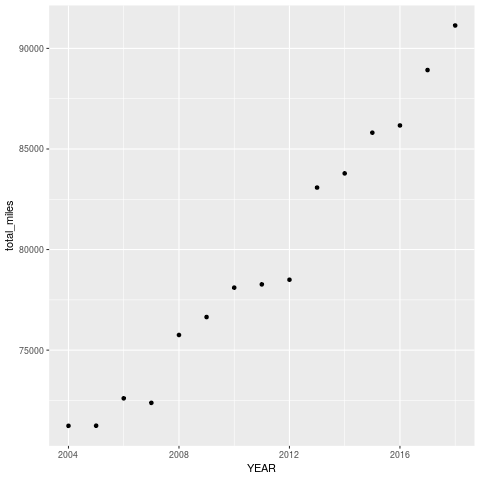

In [50]:
%%R -i pipelines_total
pipelines_total %>%
    group_by(YEAR) %>%
    filter(!is.na(MILES)) %>%
    summarize(total_miles = sum(MILES)) %>%
    ggplot(aes(x=YEAR, y=total_miles)) +
        geom_point()

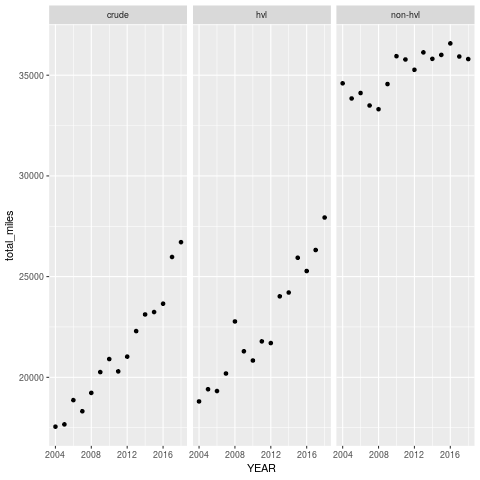

In [51]:
%%R -i pipelines_total
pipelines_total %>%
    filter(COMMODITY %in% c('hvl', 'crude', 'non-hvl')) %>%
    filter(!is.na(MILES)) %>%
    group_by(YEAR, COMMODITY) %>%
    summarize(total_miles = sum(MILES)) %>%
    ggplot(aes(x=YEAR, y=total_miles)) +
        geom_point() +
        facet_wrap(.~COMMODITY)

## 2.9 Distribution of data

See how incidents are distributed over time/operators.

In [110]:
pipelines['PARTA5COMMODITY'].unique()

array(['Crude Oil', 'HVL', 'Refined and/or Petroleum Product (non-HVL)',
       'CO2', 'Fuel Grade Ethanol (dedicated system)'], dtype=object)

In [111]:
pipelines_match = pipelines[['OPERATOR_ID', 'REPORT_YEAR', 'PARTA5COMMODITY', 'PARTBHCAONSHORE'
                            ]].rename({'REPORT_YEAR': 'YEAR', 'PARTA5COMMODITY': 'COMMODITY', 'PARTBHCAONSHORE': 'MILES'})
new_names_pipelines = {'Crude Oil': 'crude', 
                       'CO2': 'co2',
                       'Fuel Grade Ethanol (dedicated system)': 'fge', 
                       'HVL': 'hvl',
                       'Refined and/or Petroleum Product (non-HVL)': 'non-hvl'}
pipelines_match = pipelines_match.replace({'PARTA5COMMODITY': new_names_pipelines})
pipelines_match = pipelines_match.rename(columns=
                                         {'PARTA5COMMODITY': 'COMMODITY', 'PARTBHCAONSHORE': 'MILES', 'REPORT_YEAR': 'YEAR'})

pipelines_match.sample(5)

,OPERATOR_ID,YEAR,COMMODITY,MILES
4303,31502,2016,co2,0.00
1661,32632,2014,crude,99.17
4973,31556,2015,hvl,82.90
2637,31878,2013,crude,92.00
3664,31864,2018,co2,0.00


In [112]:
sum(pipelines_match['MILES'].isna())

467

In [113]:
incidents['COMMODITY_RELEASED_TYPE'].unique()

array(['REFINED AND/OR PETROLEUM PRODUCT (NON-HVL) WHICH IS A LIQUID AT AMBIENT CONDITIONS',
       'CO2 (CARBON DIOXIDE)',
       'HVL OR OTHER FLAMMABLE OR TOXIC FLUID WHICH IS A GAS AT AMBIENT CONDITIONS',
       'CRUDE OIL',
       'BIOFUEL / ALTERNATIVE FUEL(INCLUDING ETHANOL BLENDS)'],
      dtype=object)

In [114]:
incidents_match = incidents[['OPERATOR_ID', 'LOCAL_DATETIME', 'SIGNIFICANT', 'COMMODITY_RELEASED_TYPE']]
incidents_match = incidents_match.rename(columns={'COMMODITY_RELEASED_TYPE': 'COMMODITY'})

new_names_incidents = {'REFINED AND/OR PETROLEUM PRODUCT (NON-HVL) WHICH IS A LIQUID AT AMBIENT CONDITIONS': 'non-hvl', 
                       'CO2 (CARBON DIOXIDE)': 'co2', 
                       'HVL OR OTHER FLAMMABLE OR TOXIC FLUID WHICH IS A GAS AT AMBIENT CONDITIONS': 'hvl', 
                       'CRUDE OIL': 'crude', 
                       'BIOFUEL / ALTERNATIVE FUEL(INCLUDING ETHANOL BLENDS)': 'hvl'}

incidents_match = incidents_match.replace({'COMMODITY': new_names_incidents})
incidents_match['SIGNIFICANT'] = incidents_match.loc[incidents_match['SIGNIFICANT'] == 'YES']
incidents_match['YEAR'] = incidents_match['LOCAL_DATETIME'].dt.year
incidents_match = incidents_match.drop(columns=['SIGNIFICANT', 'LOCAL_DATETIME'])
incidents_match = incidents_match.groupby(['OPERATOR_ID', 'COMMODITY', 'YEAR']).size().reset_index(name='INCIDENTS')
incidents_match.sample(5)

,OPERATOR_ID,COMMODITY,YEAR,INCIDENTS
606,31371,non-hvl,2016,1
142,4906,non-hvl,2013,3
439,26085,crude,2016,5
1017,39080,crude,2016,1
965,32619,crude,2014,1


In [115]:
incidents_match = incidents_match.loc[incidents_match['COMMODITY'].isin(['crude', 'hvl', 'non-hvl'])]
n_incident_obs = len(incidents_match.loc[~incidents_match[['OPERATOR_ID', 'YEAR', 'COMMODITY']].duplicated()])
print(n_incident_obs)

pipelines_match = pipelines_match.loc[pipelines_match['COMMODITY'].isin(['crude', 'hvl', 'non-hvl'])]
n_pipelines_obs = len(pipelines_match.loc[~pipelines_match[['OPERATOR_ID', 'YEAR', 'COMMODITY']].duplicated()])
print(n_pipelines_obs)

1082
5000


In [123]:
pipelines_incidents = pipelines_match.merge(incidents_match, how='left', on=['YEAR', 'COMMODITY', 'OPERATOR_ID'])

print(len(pipelines_incidents))
pipelines_incidents['MILES'] = pipelines_incidents['MILES'].fillna(value=0)
pipelines_incidents['INCIDENTS'] = pipelines_incidents['INCIDENTS'].fillna(value=0)
pipelines_incidents.sample(5)

5000


,OPERATOR_ID,YEAR,COMMODITY,MILES,INCIDENTS
547,39359,2017,crude,0.0,0.0
1417,31847,2014,non-hvl,3.0,0.0
1360,31448,2014,crude,79.0,0.0
3016,31875,2010,hvl,89.5,0.0
4357,39348,2016,crude,95.4,0.0


### 2.9.1 Visualize

### Incidents (raw)

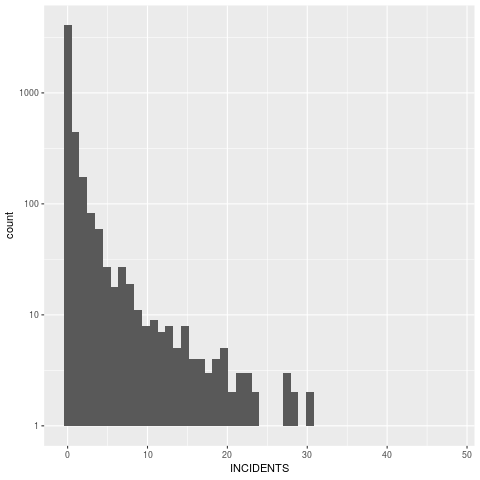

In [128]:
%%R -i pipelines_incidents
pipelines_incidents %>%
    ggplot(aes(x=INCIDENTS)) +
        geom_histogram(bins=50) + 
        scale_y_log10()

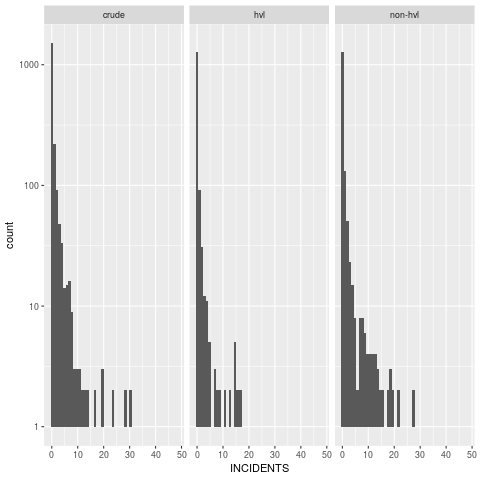

In [127]:
%%R -i pipelines_incidents
pipelines_incidents %>%
    ggplot(aes(x=INCIDENTS)) +
        geom_histogram(bins=50) + 
        facet_wrap(.~COMMODITY) +
        scale_y_log10()

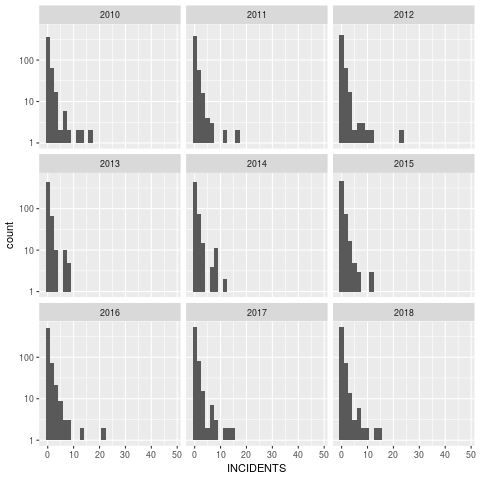

In [133]:
%%R -i pipelines_incidents
pipelines_incidents %>%
    ggplot(aes(x=INCIDENTS)) +
        geom_histogram(bins=30) + 
        facet_wrap(.~YEAR) +
        scale_y_log10()

In [136]:
%%R -i pipelines_incidents
pipelines_incidents %>%
    group_by(YEAR) %>%
    summarize(n=sum(INCIDENTS))

# A tibble: 9 x 2
   YEAR     n
  <int> <dbl>
1  2010   338
2  2011   333
3  2012   364
4  2013   388
5  2014   442
6  2015   449
7  2016   402
8  2017   404
9  2018   388


### Incidents per mile

In [137]:
%%R -i pipelines_incidents
pipelines_incidents %>%
    group_by(COMMODITY) %>%
    summarize(sum(INCIDENTS) / sum(MILES))

# A tibble: 3 x 2
  COMMODITY `sum(INCIDENTS)/sum(MILES)`
  <chr>                           <dbl>
1 crude                         0.00870
2 hvl                           0.00254
3 non-hvl                       0.00356


In [138]:
%%R -i pipelines_incidents
pipelines_incidents %>%
    group_by(COMMODITY) %>%
    summarize(sum(MILES))

# A tibble: 3 x 2
  COMMODITY `sum(MILES)`
  <chr>            <dbl>
1 crude          207224.
2 hvl            218016.
3 non-hvl        323259.


In [160]:
%%R -i pipelines_incidents
length(unique(pipelines_incidents$OPERATOR_ID))

[1] 668


In [173]:
%%R -i pipelines_incidents
pipelines_incidents %>%
    group_by(OPERATOR_ID) %>%
    summarize(INCIDENTS_MILE = sum(INCIDENTS) / (sum(MILES) + 0.01)) %>%
    mutate(INCIDENTS_MILE = sprintf("%0.2f", INCIDENTS_MILE)) %>%
    {table(.$INCIDENTS_MILE)}


   0.00    0.01    0.02    0.03    0.04    0.05    0.06    0.07    0.08    0.09 
    528      55      22       9       6       1       5       1       2       2 
   0.11    0.12    0.13    0.17    0.18    0.30    0.31    0.38    0.40    0.48 
      2       2       1       1       2       1       1       1       1       1 
   0.71    0.76    0.80    0.83    1.15  100.00 1500.00    2.15    2.83  200.00 
      1       1       1       1       1      11       2       1       1       3 
   7.32 
      1 


In [169]:
%%R -i pipelines_incidents
nrow(unique(select(pipelines_incidents, OPERATOR_ID, YEAR)))

[1] 3938


In [188]:
%%R -i pipelines_incidents
pipelines_incidents %>%
    group_by(OPERATOR_ID, YEAR) %>%
    summarize(INCIDENTS_MILE = sum(INCIDENTS) / (sum(MILES) + 0.01)) %>%
    mutate(INCIDENTS_MILE = sprintf("%0.2f", INCIDENTS_MILE)) %>%
    {table(.$INCIDENTS_MILE)}


   0.00    0.01    0.02    0.03    0.04    0.05    0.06    0.07    0.08    0.09 
   3399     228      75      50      27      18       9       7       5       1 
   0.10    0.11    0.12    0.13    0.14    0.15    0.16    0.17    0.18    0.19 
      2       4       6       2       2       2       3       6       6       2 
   0.20    0.21    0.22    0.24    0.25    0.26    0.27    0.32    0.33    0.36 
      4       1       2       1       2       2       1       3       3       1 
   0.38    0.42    0.44    0.49    0.50    0.57    0.58    0.60    0.62    0.77 
      1       2       1       1       2       1       1       1       1       1 
   0.83    0.99    1.08    1.32    1.41    1.99  100.00   13.25 1300.00    2.38 
      1       6       1       1       1       1      27       1       1       1 
   2.44  200.00    4.55  400.00    5.96    9.09 
      1       4       1       3       1       1 


In [184]:
%%R -i pipelines_incidents
incident_prone <- pipelines_incidents %>%
    group_by(OPERATOR_ID) %>%
    summarize(INCIDENTS_MILE = sum(INCIDENTS) / (sum(MILES) + 0.01)) %>%
    filter(INCIDENTS_MILE < 5) %>%
    filter(INCIDENTS_MILE >= 0.05)

print(incident_prone[1:10, ])
print(incident_prone[11:20, ])

# A tibble: 10 x 2
   OPERATOR_ID INCIDENTS_MILE
         <int>          <dbl>
 1         999         0.0578
 2       14145         0.710 
 3       26041         0.183 
 4       30756         0.125 
 5       30834         0.106 
 6       31336         0.0555
 7       31455         0.0854
 8       31580         0.120 
 9       32009         2.15  
10       32044         0.304 
# A tibble: 10 x 2
   OPERATOR_ID INCIDENTS_MILE
         <int>          <dbl>
 1       32428         0.166 
 2       32450         0.483 
 3       32483         0.0833
 4       32532         0.0587
 5       32537         2.83  
 6       32602         0.0622
 7       32613         0.0892
 8       38894         0.0508
 9       38924         0.383 
10       39012         0.311 
